In [68]:
# Clusterization

    У даній лабораторній роботі на основі даних по 46 ознаках для 250 автомобілів спробуємо провести їхню кластеризацію.
    У даній роботі розглянемо кластеризацію з використанням методу k means, ієрархічну кластеризацію і кластеризацію з використанням карт Кохонена.
    Також ми будемо порівнювати результати кластеризації різними алгоритмами.

In [69]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
# Importing the dataset
df = pd.read_csv('Cars_prep (Tomilovych, EC-61).csv', sep = ';')
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.60000,168.80000,64.10000,48.80000,2548,...,0,0,1,0,0,0,0,0,1,13495.00000
1,3,1,0,1,0,88.60000,168.80000,64.10000,48.80000,2548,...,0,0,1,0,0,0,0,0,1,16500.00000
2,1,1,0,1,0,94.50000,171.20000,65.50000,52.40000,2823,...,1,0,0,0,1,0,0,0,1,16500.00000
3,2,1,0,0,0,99.80000,176.60000,66.20000,54.30000,2337,...,0,0,1,0,0,0,0,0,1,13950.00000
4,2,1,0,0,0,99.40000,176.60000,66.40000,54.30000,2824,...,0,1,0,0,0,0,0,0,1,17450.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.10000,188.80000,68.90000,55.50000,2952,...,0,0,1,0,0,0,0,0,1,16845.00000
201,-1,1,1,0,0,109.10000,188.80000,68.80000,55.50000,3049,...,0,0,1,0,0,0,0,0,1,19045.00000
202,-1,1,0,0,0,109.10000,188.80000,68.90000,55.50000,3012,...,1,0,0,0,1,0,0,0,1,21485.00000
203,-1,0,1,0,0,109.10000,188.80000,68.90000,55.50000,3217,...,0,0,0,0,1,0,0,1,0,22470.00000


In [71]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.00000,0.83415,1.24531,-2.00000,0.00000,1.00000,2.00000,3.00000
fuel-type,205.00000,0.90244,0.29745,0.00000,1.00000,1.00000,1.00000,1.00000
aspiration,205.00000,0.18049,0.38553,0.00000,0.00000,0.00000,0.00000,1.00000
num-of-doors,205.00000,0.43415,0.49686,0.00000,0.00000,0.00000,1.00000,1.00000
engine-location,205.00000,0.01463,0.12038,0.00000,0.00000,0.00000,0.00000,1.00000
wheel-base,205.00000,98.73659,5.95430,86.60000,94.50000,97.00000,102.40000,116.80000
length,205.00000,174.04927,12.33729,141.10000,166.30000,173.20000,183.10000,208.10000
width,205.00000,65.90780,2.14520,60.30000,64.10000,65.50000,66.90000,72.30000
height,205.00000,53.72488,2.44352,47.80000,52.00000,54.10000,55.50000,59.80000
curb-weight,205.00000,2555.56585,520.68020,1488.00000,2145.00000,2414.00000,2935.00000,4066.00000


    Для задачі кластеризації ознаки були прошкальовані за методом MinMax, що привело їх усіх у інтервал [0; 1].

In [72]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
cols=df.columns
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns=cols)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.00000,0.56683,0.24906,0.00000,0.40000,0.60000,0.80000,1.00000
fuel-type,205.00000,0.90244,0.29745,0.00000,1.00000,1.00000,1.00000,1.00000
aspiration,205.00000,0.18049,0.38553,0.00000,0.00000,0.00000,0.00000,1.00000
num-of-doors,205.00000,0.43415,0.49686,0.00000,0.00000,0.00000,1.00000,1.00000
engine-location,205.00000,0.01463,0.12038,0.00000,0.00000,0.00000,0.00000,1.00000
wheel-base,205.00000,0.40187,0.19716,0.00000,0.26159,0.34437,0.52318,1.00000
length,205.00000,0.49178,0.18414,0.00000,0.37612,0.47910,0.62687,1.00000
width,205.00000,0.46732,0.17877,0.00000,0.31667,0.43333,0.55000,1.00000
height,205.00000,0.49374,0.20363,0.00000,0.35000,0.52500,0.64167,1.00000
curb-weight,205.00000,0.41411,0.20197,0.00000,0.25485,0.35919,0.56129,1.00000


    Далі побудуємо кореляційну матрицю, щоб обрати з неї змінні, які мають найбільше варіативність.

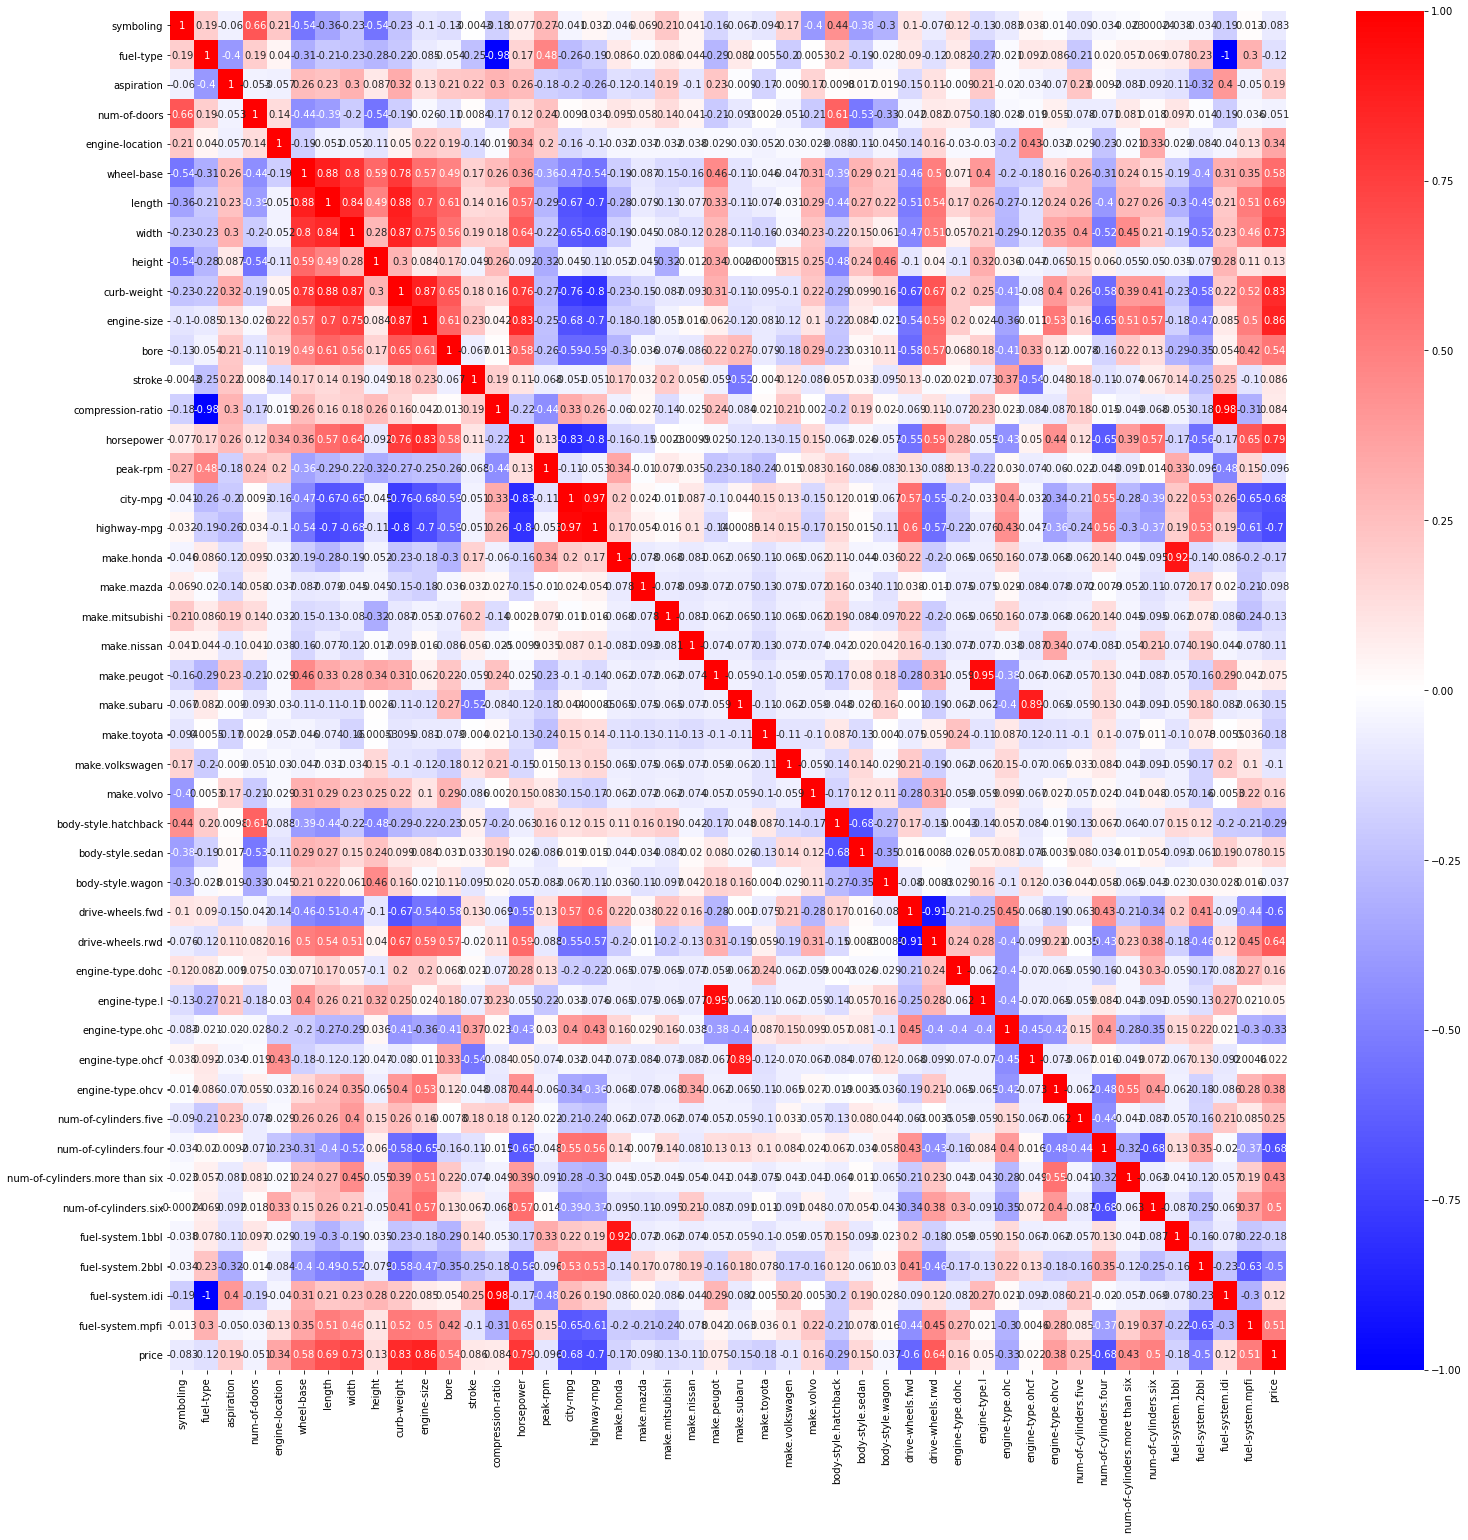

In [73]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, annot=True, cmap='bwr')
plt.show()

    З даної таблиці доволі важко вибрати важливі для кластеризації змінні, які забезпечать найбільшу варіативність. Розглянемо значень по всіх ознаках.

In [74]:
df.sum()

symboling                        116.20000
fuel-type                        185.00000
aspiration                        37.00000
num-of-doors                      89.00000
engine-location                    3.00000
wheel-base                        82.38411
length                           100.81493
width                             95.80000
height                           101.21667
curb-weight                       84.89178
engine-size                       69.72251
bore                             115.64286
stroke                           104.46774
compression-ratio                 42.33466
horsepower                        65.30286
peak-rpm                          83.06816
city-mpg                          78.09375
highway-mpg                       86.25714
make.honda                        13.00000
make.mazda                        17.00000
make.mitsubishi                   13.00000
make.nissan                       18.00000
make.peugot                       11.00000
make.subaru

    Занадто високим або занадто низьким значенням суми відповідає мала варіативність змінної. Можна побачити, що низьковаріативні змінні в основному є якісними. Позбудемося, видаливши з розглядуваного набору даних ті ознаки, сума значень яких менша-рівна 20 або більша-рівна 184, і виведемо ознаки, які залишилися.

In [75]:
for col in cols:
    if df[[col]].sum()[0] <= 20:
        df.drop(col, axis=1, inplace=True)
    elif df[[col]].sum()[0] >= 184:
        df.drop(col, axis=1, inplace=True)

In [76]:
# Selected Features
print(str(len(df.sum()))+' selected features:')
df.columns

28 selected features:


Index(['symboling', 'aspiration', 'num-of-doors', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make.toyota', 'body-style.hatchback',
       'body-style.sedan', 'body-style.wagon', 'drive-wheels.fwd',
       'drive-wheels.rwd', 'engine-type.ohc', 'num-of-cylinders.four',
       'num-of-cylinders.six', 'fuel-system.2bbl', 'fuel-system.mpfi',
       'price'],
      dtype='object')

    З 46 ознак було відібрано 28. Для них побудуємо кореляційну матрицю.

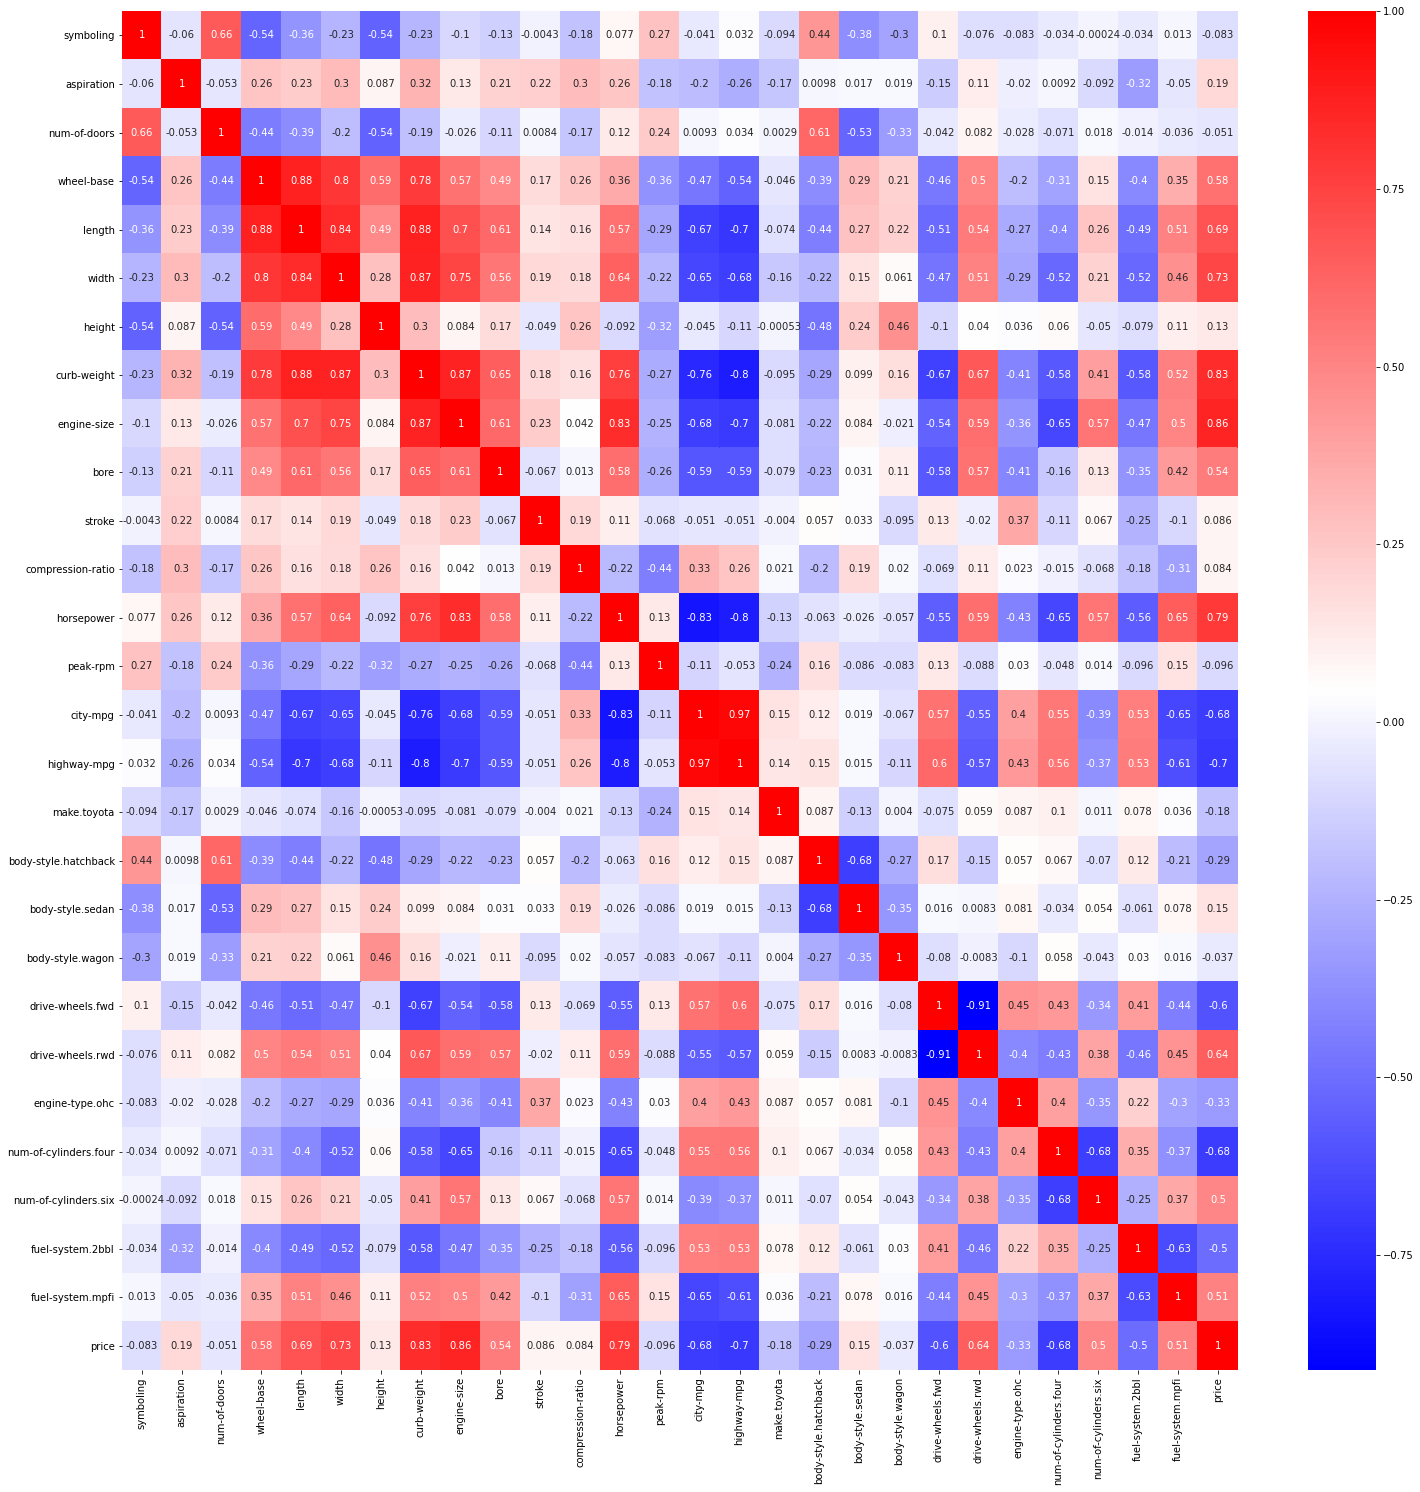

In [77]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, annot=True, cmap='bwr')
plt.show()

    З цієї матриці все ще важко вибрати важливі для кластеризації ознаки, тому спочатку розглянемо кластеризацію за методом k-means.
    Для цього визначимо оптимальне число кластерів за правилом ліктя і критерієм силуету.

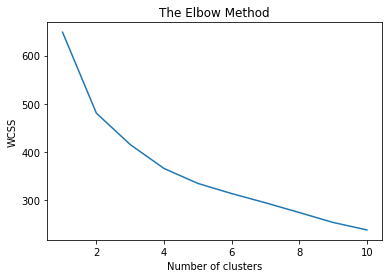

In [78]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

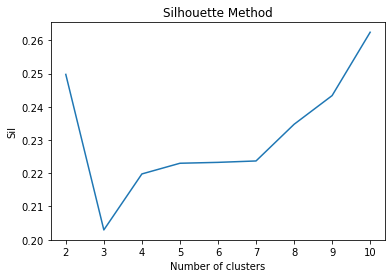

2:0.24974948112764814
3:0.20293463734790468
4:0.21978532331234937
5:0.22300216884713542
6:0.2232711848663143
7:0.2236912587209143
8:0.2347241489916077
9:0.24337117925488116
10:0.26244188465980106


In [79]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 11), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

    Можна побачити, що за правилом ліктя найбільший згин спостерігається для 2 кластерів. Що ж до критерію силуету, то його значення для 2 кластерів перевищується тільки для 9 і більше кластерів, що є досить високим числом, тому перевагу варто надати 2 кластерам.

In [80]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 123).fit(df)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame(kms.cluster_centers_, columns = df.columns).T

,0,1
symboling,0.54713,0.58136
aspiration,0.27586,0.11017
num-of-doors,0.43678,0.43220
wheel-base,0.52919,0.30800
length,0.62791,0.39141
width,0.60000,0.36949
height,0.52193,0.47295
curb-weight,0.59170,0.28317
engine-size,0.48781,0.23121
bore,0.69433,0.46810


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.00000,0.56683,0.24906,0.00000,0.40000,0.60000,0.80000,1.00000
aspiration,205.00000,0.18049,0.38553,0.00000,0.00000,0.00000,0.00000,1.00000
num-of-doors,205.00000,0.43415,0.49686,0.00000,0.00000,0.00000,1.00000,1.00000
wheel-base,205.00000,0.40187,0.19716,0.00000,0.26159,0.34437,0.52318,1.00000
length,205.00000,0.49178,0.18414,0.00000,0.37612,0.47910,0.62687,1.00000
width,205.00000,0.46732,0.17877,0.00000,0.31667,0.43333,0.55000,1.00000
height,205.00000,0.49374,0.20363,0.00000,0.35000,0.52500,0.64167,1.00000
curb-weight,205.00000,0.41411,0.20197,0.00000,0.25485,0.35919,0.56129,1.00000
engine-size,205.00000,0.34011,0.19864,0.00000,0.18848,0.30890,0.41885,1.00000
bore,205.00000,0.56411,0.19346,0.00000,0.43571,0.55000,0.74286,1.00000


    Можна побачити, що змінних, на основі яких проводлася кластеризації дуже багато і частина координат центрів отриманих кластерів для частини змінних не дуже відрізняється між собою, а також від середнього значення ознаки по всій вибірці. У цьому випадку виберемо тільки ті змінні, центри кластерів по відповідній координаті яких відрізняється більш, ніж на 0,3. Усього таких змінних 9. Для цих 9 змінних визначимо оптимальну кількість кластерів за правилом ліктя і критерієм силуету.

In [81]:
select_cols = ['curb-weight','horsepower','drive-wheels.fwd','drive-wheels.rwd','engine-type.ohc','num-of-cylinders.four',
              'fuel-system.2bbl','fuel-system.mpfi','price']
X = df[select_cols]
X

,curb-weight,horsepower,drive-wheels.fwd,drive-wheels.rwd,engine-type.ohc,num-of-cylinders.four,fuel-system.2bbl,fuel-system.mpfi,price
0,0.41117,0.36000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.26430
1,0.41117,0.36000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.35911
2,0.51784,0.60571,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.35911
3,0.32933,0.30857,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.27866
4,0.51823,0.38286,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.38908
...,...,...,...,...,...,...,...,...,...
200,0.56788,0.37714,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.37000
201,0.60551,0.64000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.43941
202,0.59116,0.49143,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.51639
203,0.67067,0.33143,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.54747


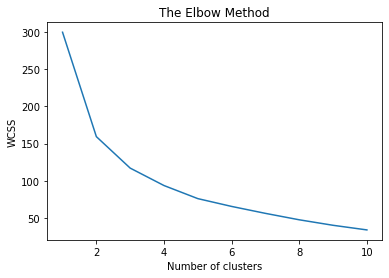

In [82]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

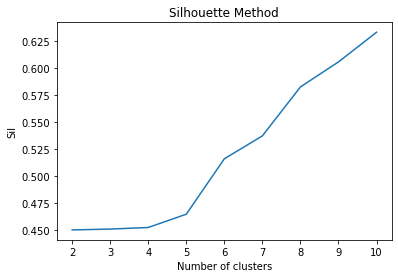

2:0.45049857965610773
3:0.45127101364649475
4:0.45274392734983226
5:0.4650428572698759
6:0.5162809192766594
7:0.5374848013480311
8:0.5827351395338416
9:0.6058705161084144
10:0.6333015500053185


In [83]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k).fit(X)  
  preds = kmeans.fit_predict(X)
  sil.append(silhouette_score(X, preds, metric = 'euclidean'))


plt.plot(range(2, 11), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

        Можна побачити, що за правилом ліктя найбільший згин спостерігається для 2 кластерів. Що ж до критерію силуету, то спостерігається його постійне зростання, що не дозволяє говорити про оптимальне число кластерів. Тому виберемо оптимальне число кластерів за правилом ліктя - 2.

In [105]:
# Fitting K-Means to the dataset
km_opt = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123).fit_predict(X)
kms_opt = KMeans(n_clusters = 2, random_state = 123).fit(X)
pd.DataFrame(kms_opt.cluster_centers_, columns = select_cols)

,curb-weight,horsepower,drive-wheels.fwd,drive-wheels.rwd,engine-type.ohc,num-of-cylinders.four,fuel-system.2bbl,fuel-system.mpfi,price
0,0.59842,0.49657,0.03750,0.91250,0.45000,0.50000,0.00000,0.80000,0.44960
1,0.29615,0.20462,0.93600,0.02400,0.89600,0.95200,0.52800,0.24000,0.12639


    Центри кластерів, отриманих з 9 змінних не дуже змістилися, так для 8 з 9 ознак вони все ще віддалені на більш, ніж 0,3. Для ознаки horsepower вони віддалені на трошки менше значення, ніж 0,3; тому не будемо виключати цю ознаку з набору даних для кластеризації.
    Порівнявши координати центів кластерів з середнім значенням відповідних ознак можна інтерпретувати кластери наступним чином. Так, для нульового кластера характерно:
    1. споряджена маса автомобіля (curb-weight) в основному велика, більша, ніж в іншому кластері та по всій вибірці в середньому;
    2. кількість кінських сил (horsepower) в основному висока, більша, ніж в іншому кластері та по всій вибірці в середньому;
    3. абсолютну більшість автомобілів цього класу складають автомобілі з заднім приводом RWD, а не переднім FWD (змінна drive-wheels);
    4. кластер характеризується невисокою часткою автомобілів з типом двигуна(engine-type) ohc, меншою, ніж для всієї вибірки та іншого кластера;
    5. автомобілі мають в основному паливну систему (fuel-system) mpfi, а не 2bbl;
    6. ціна автомобілів (price) цього кластеру є високою, більшою, ніж в іншому кластері та по всій вибірці в середньому.
    Тоді перший кластер характеризується наступним чином:
    1. споряджена маса автомобіля (curb-weight) в основному мала, менша, ніж в іншому кластері та по всій вибірці в середньому;
    2. кількість кінських сил (horsepower) в основному мала, менша, ніж в іншому кластері та по всій вибірці в середньому;
    3. абсолютну більшість автомобілів цього класу складають автомобілі з переднім приводом FWD, а не заднім RWD (змінна drive-wheels);
    4. кластер характеризується високою часткою автомобілів з типом двигуна(engine-type) ohc, більшою, ніж для всієї вибірки та іншого кластера;
    5. автомобілі мають в основному паливну систему (fuel-system) 2bbl, а не mpfi;
    6. ціна автомобілів (price) цього кластеру є невисокою, нижчою, ніж в іншому кластері та по всій вибірці в середньому.

In [85]:
X.describe()

,curb-weight,horsepower,drive-wheels.fwd,drive-wheels.rwd,engine-type.ohc,num-of-cylinders.four,fuel-system.2bbl,fuel-system.mpfi,price
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.41411,0.31855,0.58537,0.37073,0.72195,0.77561,0.32195,0.45854,0.25252
std,0.20197,0.21474,0.49386,0.48418,0.44913,0.41820,0.46837,0.49950,0.23885
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.25485,0.12571,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.08424
50%,0.35919,0.26857,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.17280
75%,0.56129,0.38857,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.35911
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [86]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km, km_opt)

0.8673274734728285

    Можна побачити, що вибрані 9 змінних на 86,7% повторюють кластеризацію за 28 змінними, а отже вони внесли найбльший вклад у кластеризацію і доволі схожі результати можна отримати й з меншою кількістю кластерів.
    Перевіримо чи повторюється така кластеризація на основі відібраних змінних при ієрархічній кластеризації.

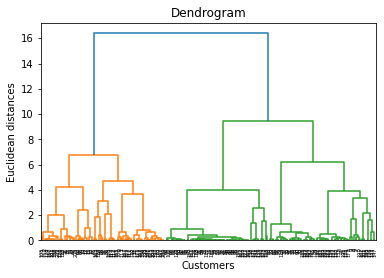

In [87]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_opt = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

    З дендограми видно, що оптимальною кількістю кластерів є 2. Виділимо їх за методом ієрархічної кластеризації і порівняємо з результатами кластеризації за методом k-means.

In [88]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc_opt = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)
hc_opt

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [89]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_opt, km_opt)

0.8129795739542185

    Можна побачити, що результати кластеризації на основі оптимальних ознак повторюються на 81,3%; що є досить високим показником. Тепер спробуємо розглянути кластеризацію з використанням відібраних 9 ознак за допомогою карт Кохонена, аби порівняти отримані результати.
    Оскільки наша вибірка має 205 спостережень, то для неї необхідно побудувати карту з мінімум 205/5=41 сотами. У нашому випадку будуватимемл карту 5*9, тобто з 45 сотами.

In [90]:
import SimpSOM as sps
np.random.seed(123456789)
X_array=X.values
net_opt = sps.somNet(5, 9, X_array, PBC=True)
net_opt.train(0.01, 2000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


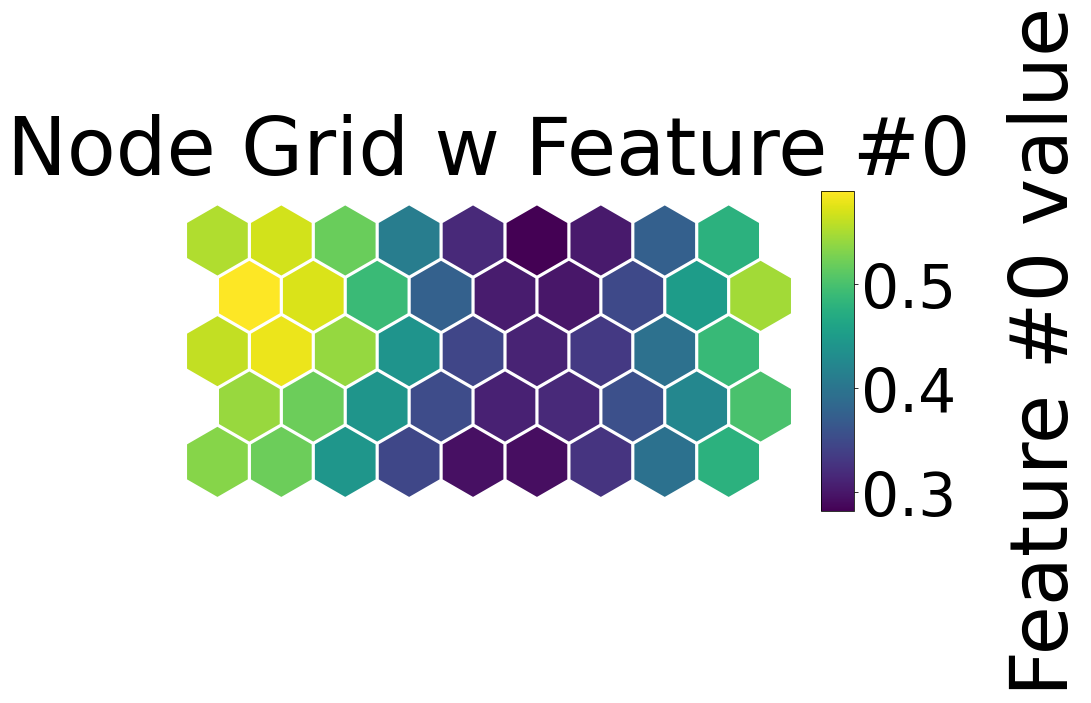

In [91]:
net_opt.nodes_graph(colnum=0)

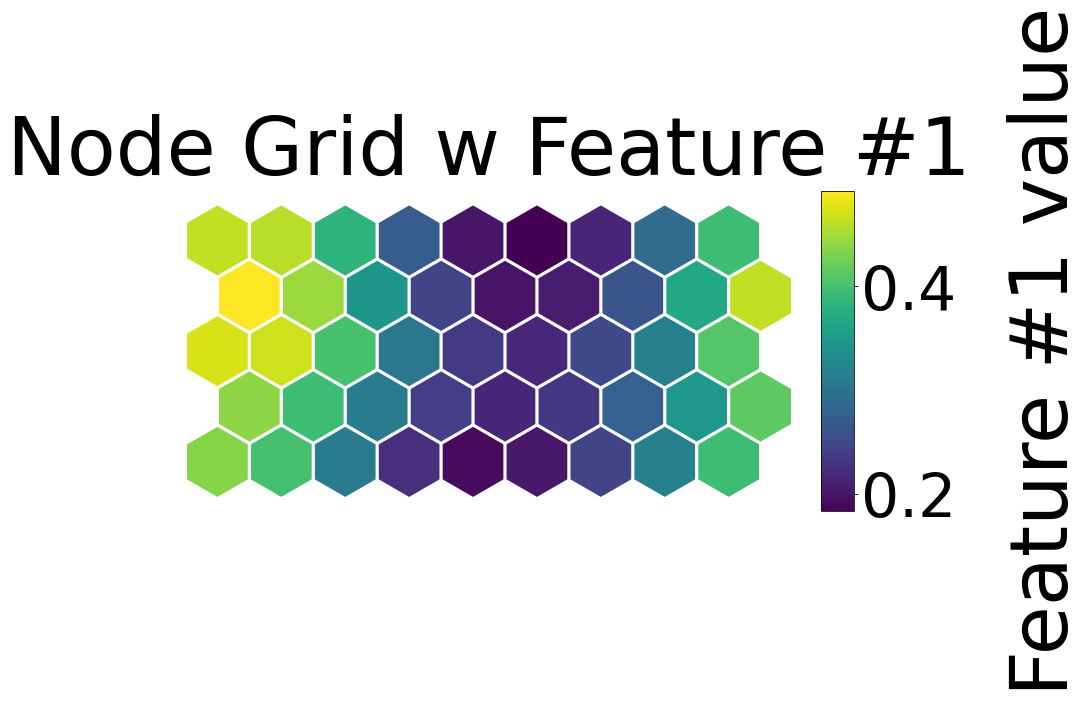

In [92]:
net_opt.nodes_graph(colnum=1)

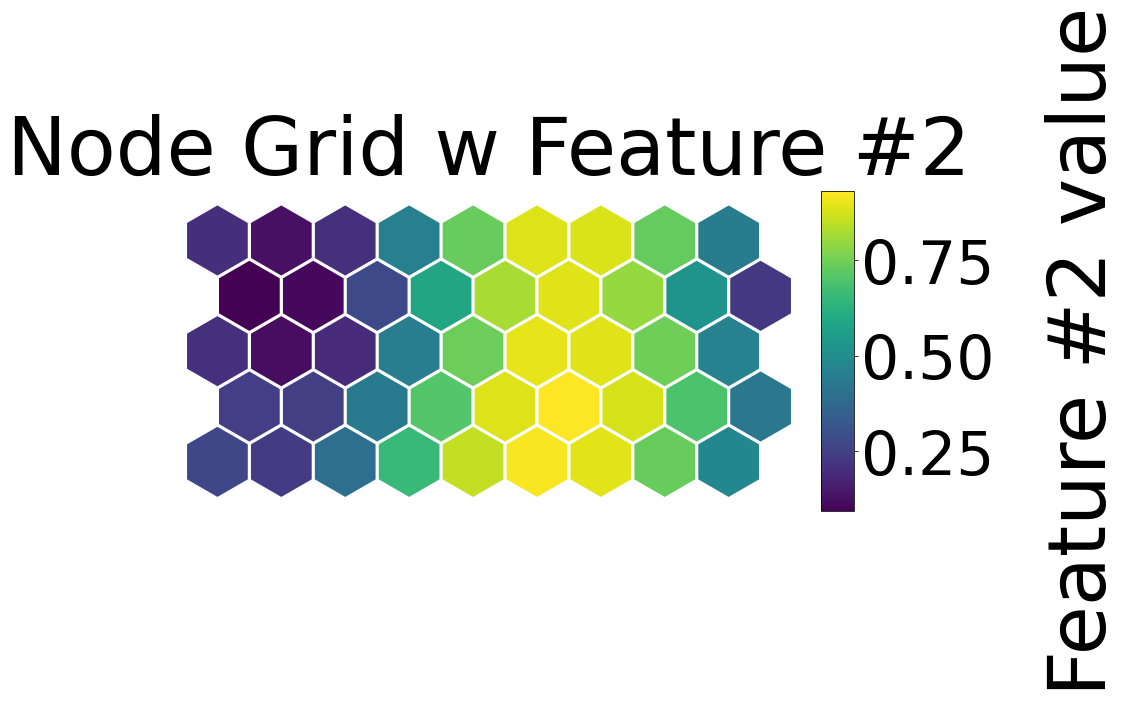

In [93]:
net_opt.nodes_graph(colnum=2)

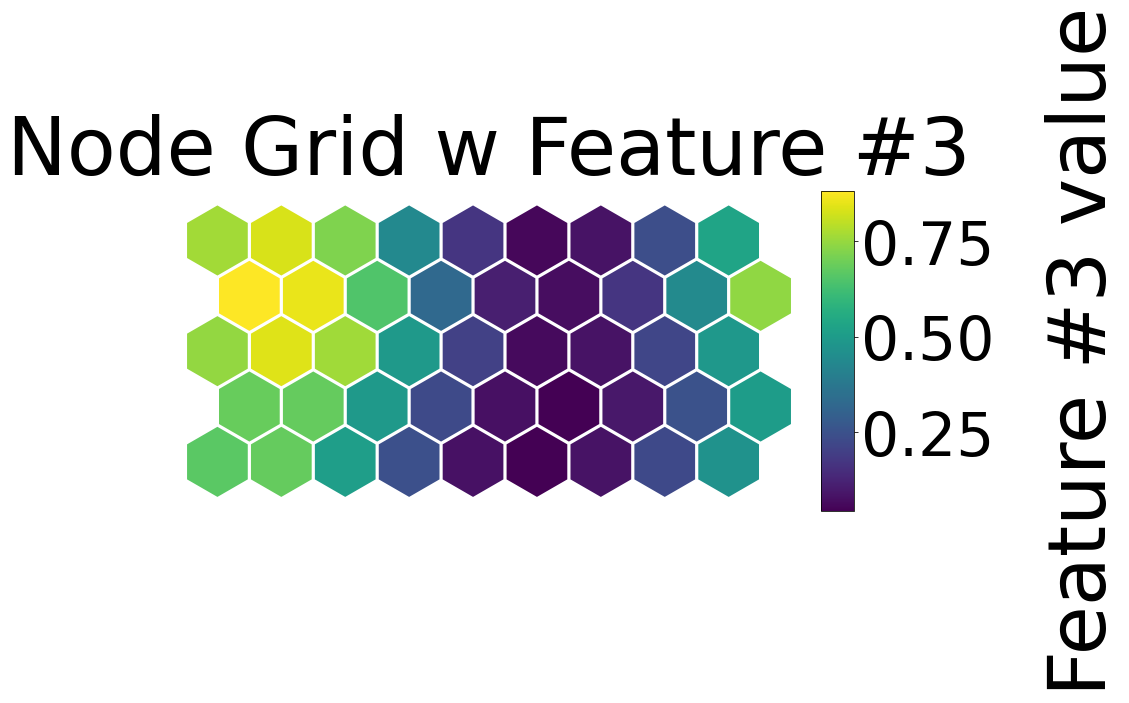

In [94]:
net_opt.nodes_graph(colnum=3)

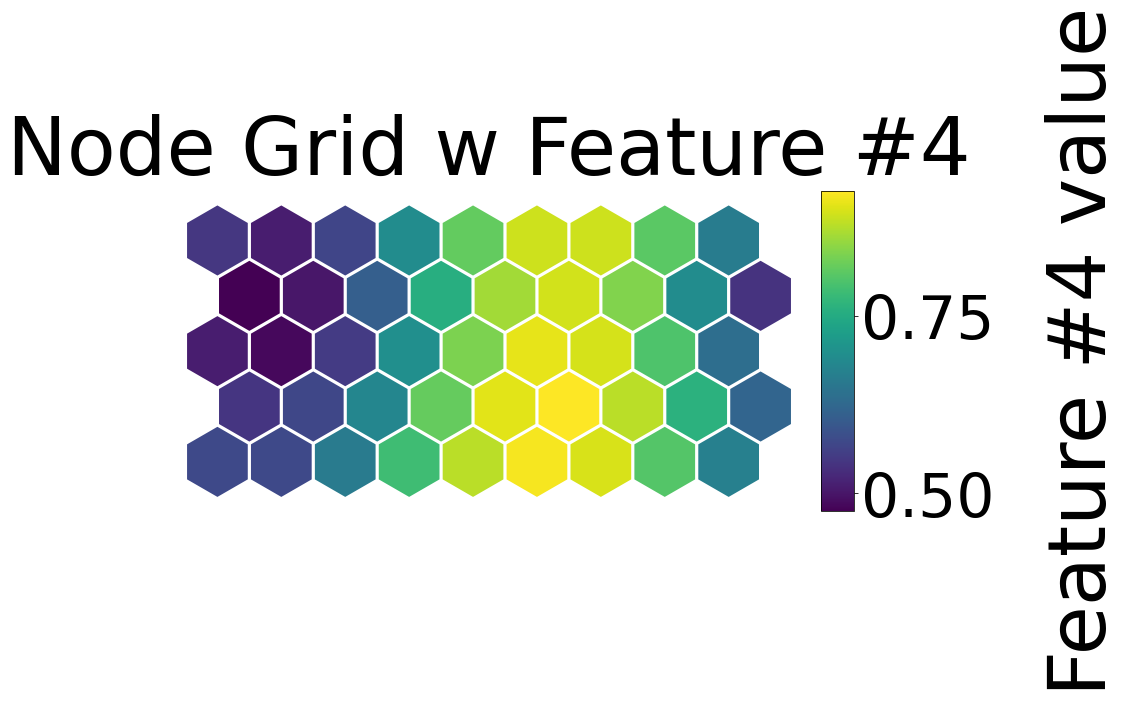

In [95]:
net_opt.nodes_graph(colnum=4)

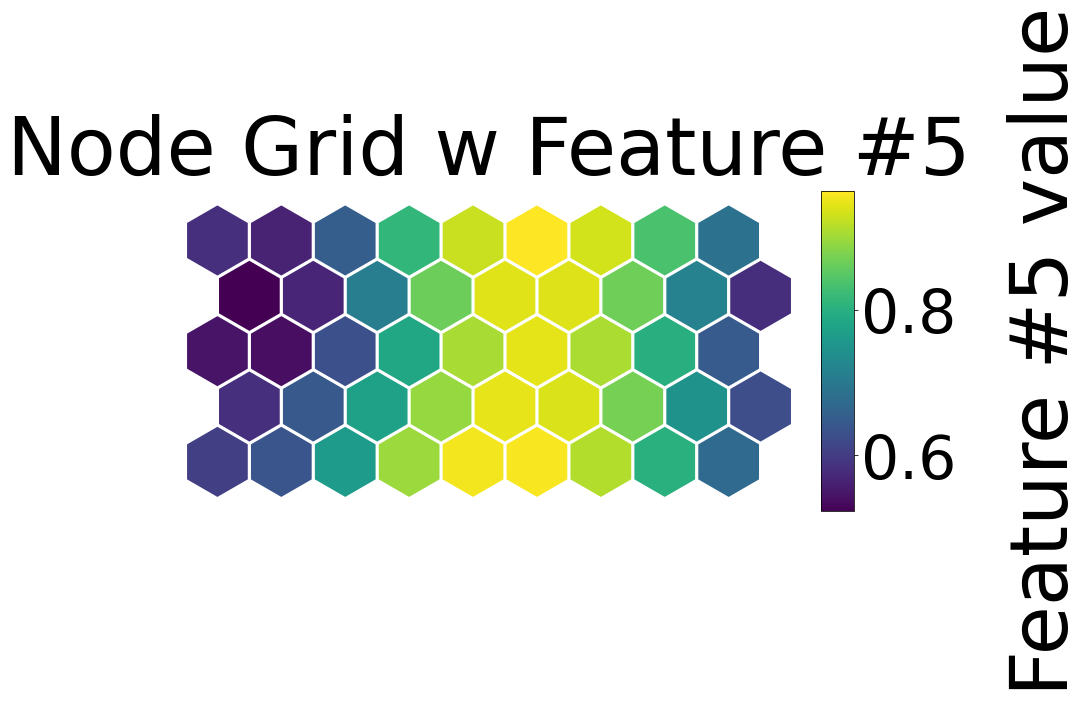

In [96]:
net_opt.nodes_graph(colnum=5)

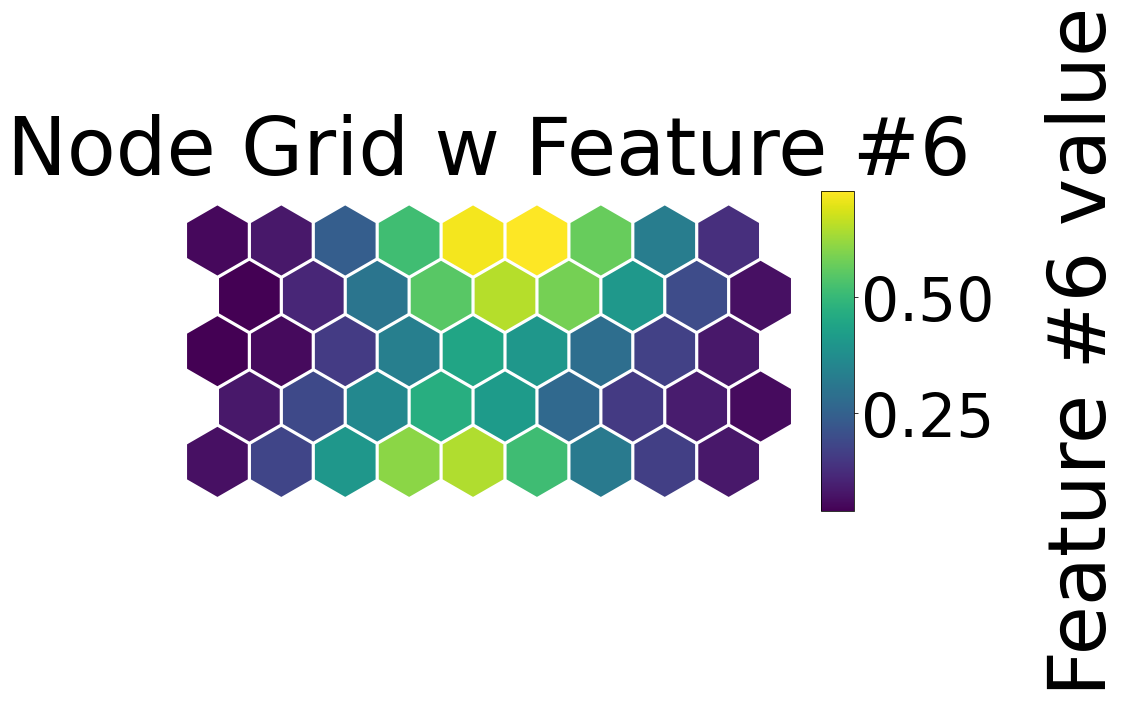

In [97]:
net_opt.nodes_graph(colnum=6)

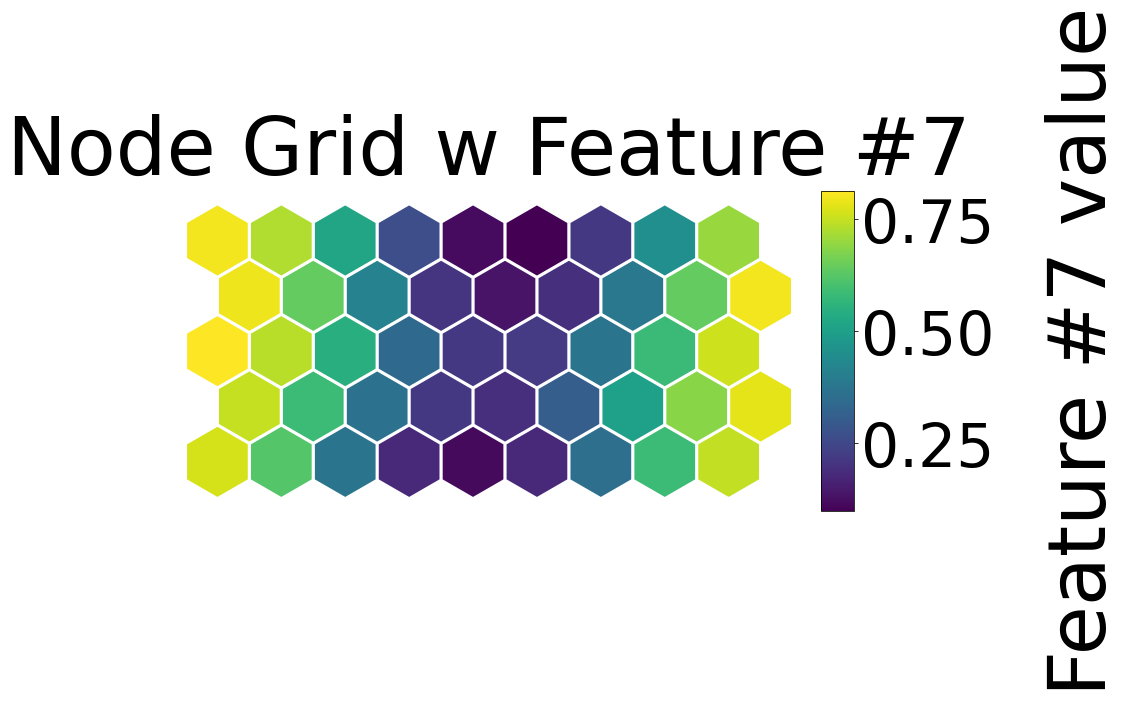

In [98]:
net_opt.nodes_graph(colnum=7)

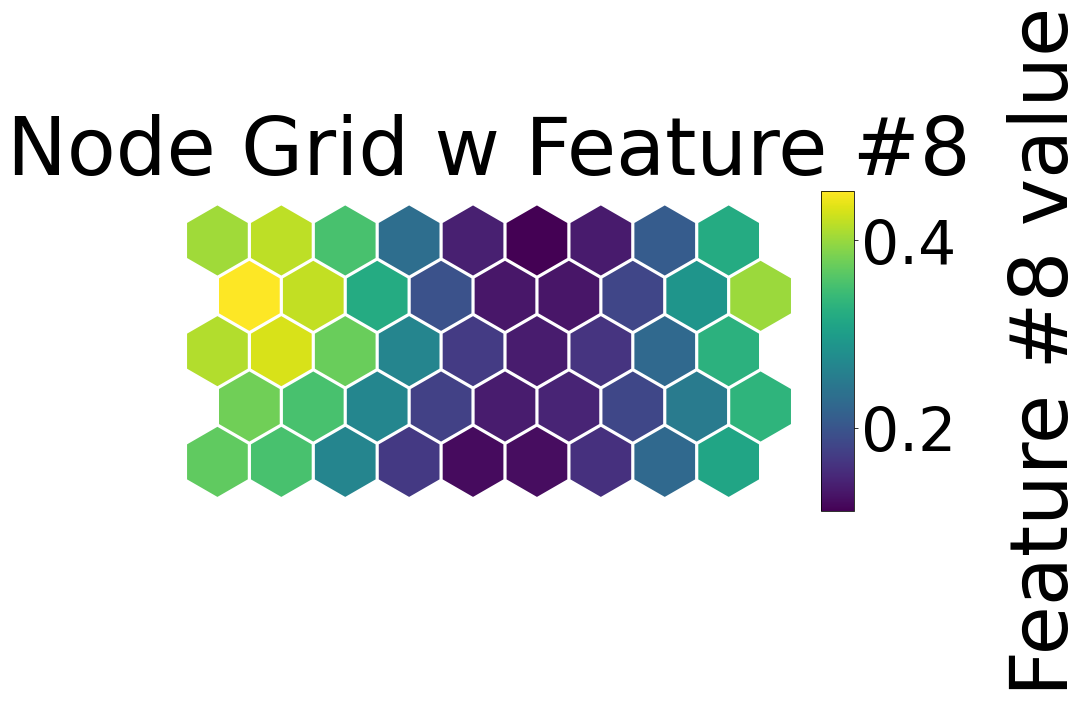

In [99]:
net_opt.nodes_graph(colnum=8)

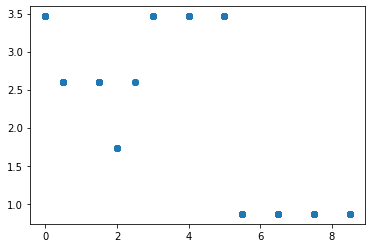

In [100]:
prj_opt=np.array(net_opt.project(X_array))
plt.scatter(prj_opt.T[0],prj_opt.T[1])
plt.show()

    З отриманого графіку можна побачити, що цілком не можна чітко виділити 2 кластери. Тому припасуємо результати самонавчання карти Кохонена до 2 кластерів і порівняємо їх з результатами інших алгоритмів.

In [101]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans_opt = KMeans(n_clusters=2, random_state=123).fit(prj_opt)

In [102]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_opt, km_opt), adjusted_rand_score(km_opt, kmeans_opt.labels_), adjusted_rand_score(hc_opt, kmeans_opt.labels_)

(0.8129795739542185, 0.7607636368736918, 0.9418638356671649)

    Результати поділу на 2 кластери за картою Кохонена доволі точно повторюють результати лкастеризації для 2 інших методів: на 76% для методу k-means і 94,1% для ієрархічної кластеризації. Звідси можна стверджувати, що отримані 2 кластери є доволі стійкими, оскільки з досить високою точністю повторюються для різних алгоритмів кластеризації.

    Таким чином, оптимальним числом кластерів є 2, які можна проінтерпретувати. Так, для одного кластера характерно:
    1. споряджена маса автомобіля (curb-weight) в основному велика, більша, ніж в іншому кластері та по всій вибірці в середньому;
    2. кількість кінських сил (horsepower) в основному висока, більша, ніж в іншому кластері та по всій вибірці в середньому;
    3. абсолютну більшість автомобілів цього класу складають автомобілі з заднім приводом RWD, а не переднім FWD (змінна drive-wheels);
    4. кластер характеризується невисокою часткою автомобілів з типом двигуна(engine-type) ohc, меншою, ніж для всієї вибірки та іншого кластера;
    5. автомобілі мають в основному паливну систему (fuel-system) mpfi, а не 2bbl;
    6. ціна автомобілів (price) цього кластеру є високою, більшою, ніж в іншому кластері та по всій вибірці в середньому.
    Другий кластер характеризується наступним чином:
    1. споряджена маса автомобіля (curb-weight) в основному мала, менша, ніж в іншому кластері та по всій вибірці в середньому;
    2. кількість кінських сил (horsepower) в основному мала, менша, ніж в іншому кластері та по всій вибірці в середньому;
    3. абсолютну більшість автомобілів цього класу складають автомобілі з переднім приводом FWD, а не заднім RWD (змінна drive-wheels);
    4. кластер характеризується високою часткою автомобілів з типом двигуна(engine-type) ohc, більшою, ніж для всієї вибірки та іншого кластера;
    5. автомобілі мають в основному паливну систему (fuel-system) 2bbl, а не mpfi;
    6. ціна автомобілів (price) цього кластеру є невисокою, нижчою, ніж в іншому кластері та по всій вибірці в середньому.
    Звичайно, можна розглянути також кластеризацію з іншим набором ознак або кількістю кластерів, але оскільки в даній роботі була отримана доволі стійка кластеризація з поділом на 2 кластери, то додатково це не буде виконуватися у цій роботі.